# Plik roboczy

In [1]:
using Plots
using IJulia
gr()

Plots.GRBackend()

rungekutta4 - źródło kodu:
https://perso.crans.org/besson/publis/notebooks/Runge-Kutta_methods_for_ODE_integration_in_Julia.html

In [2]:
function rungekutta4(f, y0, t)
    n = length(t)
    y = zeros((n, length(y0)))
    y[1,:] = y0
    for i in 1:n-1
        h = t[i+1] - t[i]
        k1 = f(y[i,:], t[i])
        k2 = f(y[i,:] + k1 * h/2, t[i] + h/2)
        k3 = f(y[i,:] + k2 * h/2, t[i] + h/2)
        k4 = f(y[i,:] + k3 * h, t[i] + h)
        y[i+1,:] = y[i,:] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    end
    return y
end

rungekutta4 (generic function with 1 method)

## Równania ruchu piłki

https://indico.cern.ch/event/163205/contributions/1413227/attachments/192775/270516/Team351.pdf

$\begin{align}    
    &\text{Siła ciężkości:}  &&F_g = -mg\hat{y} \\
    &\text{Siła wyporu:}  &&F_w = \rho V g \,\hat{y} = B \, \hat{y} \\
    &\text{Siła oporu powietrza:} &&F_o = -C_d\rho A v^2 \hat{v} = -bv^2\hat{v} = -b(\dot{x}^2 + \dot{y}^2)^{\frac{1}{2}}(\dot{x}\hat{x} + \dot{y}\hat{y})\\
    &\text{Siła Magnusa:} &&F_M = C_M \rho D^3 \bar{\omega} \times \bar{v} = c \, \bar{\omega} \times \bar{v} = -c \, \omega \dot{y}\hat{x} + c \, \omega \dot{x}\hat{y}\\
\end{align}$

$$ \begin{cases} m\ddot{x} = -b(\dot{x}^2 + \dot{y}^2)^{\frac{1}{2}}\dot{x} - c\,\omega\,\dot{y} \\
m\ddot{y} = -mg + B -b(\dot{x}^2 + \dot{y}^2)^{\frac{1}{2}}\dot{y} + c\,\omega\,\dot{x} \end{cases}$$

In [3]:
# u = [x, x', y, y']
# u' = [x', x'', y', y'']

g = 9.81
m = 0.623
c = 0.00287
B = 0.0088
b = 0.003
ω = 4π

function basketball_throw(u, t)
    return [u[2], (- b * sqrt(u[2]^2 + u[4]^2) * u[2] - c * ω * u[4]) / m,
            u[4], (- m * g + B - b * sqrt(u[2]^2 + u[4]^2) * u[4] + c * ω * u[2]) / m]
end

basketball_throw (generic function with 1 method)

$$ \dot{x} = v_0\cos{\theta_0} $$
$$ \dot{y} = v_0\sin{\theta_0} $$

In [4]:
# absolute parameters (given in meters)

three_point_line_x = 7.24
free_throw_line_x  = 3.96
rim_y = 3.05
rim_diameter  = 0.46
ball_diameter = 0.2387

# relative parameters (given in meters)

players_height = 1.8

1.8

In [5]:
v₀ = 9.2
θ₀ = 55
rθ₀ = θ₀ / 180 * π  # [rad]

x₀ = 0
time = 3 # [seconds]
u₀ = [x₀; v₀ * cos(rθ₀); players_height; v₀ * sin(rθ₀)]
tspan = range(0, stop=time, length=time*60) # [time*60 - miliseconds]
sol = rungekutta4(basketball_throw, u₀, tspan);

In [6]:
rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])

function visualize_throw(sol, distance, t)
    
    plot( # trajectory
        sol[1:t,1], 
        sol[1:t,3], 
        xlims=[0,distance + 1], 
        ylims=[0, maximum(sol[:, 3])], 
        linestyle=:dash, 
        legend = :none,
        color=:royalblue1
        )
    
    plot!( # rim
        rectangle(0.6, 0.08,
        distance - 0.6, rim_y), 
        opacity=.7, 
        color= :orangered1
        )
    
    plot!( # pole
        rectangle(0.1, rim_y, distance, 0), 
        opacity=.5, 
        color=:grey
        )
    
    plot!( # net
        Shape([distance - 0.55, distance, distance - 0.2, distance - 0.45], 
                [rim_y, rim_y, rim_y - 0.5, rim_y - 0.5]), 
        color=:white, 
        opacity = .3, 
        aspect_ratio=:equal
        )   
end

visualize_throw (generic function with 1 method)

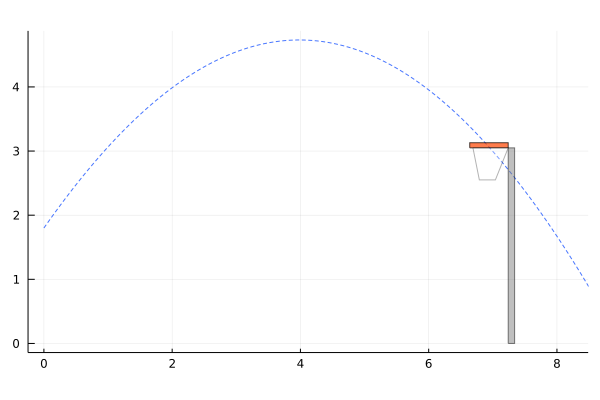

In [7]:
visualize_throw(sol, three_point_line_x, 180)

In [14]:
function animate_throw(trajektories, distance, t, delay)
    for sol in trajektories
        for i in 1:t
            
            visualize_throw(sol, distance, i)
            
            scatter!( # ball
                [sol[i, 1]], 
                [sol[i, 3]], 
                markersize=10, 
                label="", 
                color=:darkorange1
                ) |> IJulia.display
            
            IJulia.clear_output(true)
            sleep(delay)
        end
    end
end

animate_throw (generic function with 1 method)

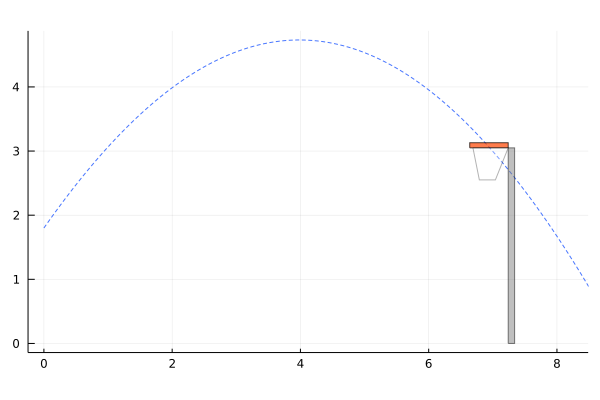

In [19]:
animate_throw([sol], three_point_line_x, 180, 0.005)